In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# download data
water_quality = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/water_quality.csv')

weather = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/weather.csv')

In [5]:
water_quality.head()

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude,longitude
0,Western Sydney,Hawkesbury City Council,Windsor Beach,2025-04-28,11:00:00,620.0,20.0,248.0,-33.604483,150.817039
1,Sydney Harbour,North Sydney Council,Hayes Street Beach,2025-04-28,11:40:00,64.0,21.0,45250.0,-33.841715,151.219382
2,Sydney Harbour,Willoughby City Council,Northbridge Baths,2025-04-28,10:54:00,160.0,21.0,48930.0,-33.806043,151.222754
3,Sydney Harbour,Northern Beaches Council,Fairlight Beach,2025-04-28,09:28:00,54.0,21.0,52700.0,-33.800731,151.274778
4,Western Sydney,Hawkesbury City Council,Yarramundi Reserve,2025-04-28,10:35:00,720.0,18.0,64.0,-33.609123,150.697886


In [6]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123530 entries, 0 to 123529
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 123530 non-null  object 
 1   council                123530 non-null  object 
 2   swim_site              123530 non-null  object 
 3   date                   123530 non-null  object 
 4   time                   112338 non-null  object 
 5   enterococci_cfu_100ml  123223 non-null  float64
 6   water_temperature_c    48491 non-null   float64
 7   conductivity_ms_cm     44994 non-null   float64
 8   latitude               123530 non-null  float64
 9   longitude              123530 non-null  float64
dtypes: float64(5), object(5)
memory usage: 9.4+ MB


In [10]:
water_quality.describe()

,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude,longitude
count,1.232230e+05,48491.000000,44994.000000,123530.000000,123530.000000
mean,1.167744e+02,19.823204,51560.121505,-33.836779,151.245408
std,4.714628e+03,13.944991,9523.704494,0.123238,0.091964
min,0.000000e+00,0.000000,0.000000,-34.069840,150.235487
25%,0.000000e+00,17.000000,52600.000000,-33.914578,151.200127
50%,4.000000e+00,20.000000,53800.000000,-33.828066,151.266231
75%,1.900000e+01,22.000000,54300.000000,-33.767605,151.297338
max,1.100000e+06,1040.000000,710400.000000,-33.598779,151.332569


In [7]:
weather.head()

,date,max_temp_C,min_temp_C,precipitation_mm,latitude,longitude
0,1991-01-01,29.3,22.1,2.4,-33.848858,151.19551
1,1991-01-02,27.5,22.4,0.0,-33.848858,151.19551
2,1991-01-03,28.2,21.1,0.0,-33.848858,151.19551
3,1991-01-04,30.8,23.7,0.0,-33.848858,151.19551
4,1991-01-05,30.4,19.5,12.2,-33.848858,151.19551


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12538 non-null  object 
 1   max_temp_C        12538 non-null  float64
 2   min_temp_C        12538 non-null  float64
 3   precipitation_mm  12538 non-null  float64
 4   latitude          12538 non-null  float64
 5   longitude         12538 non-null  float64
dtypes: float64(5), object(1)
memory usage: 587.8+ KB


In [11]:
weather.describe()

,max_temp_C,min_temp_C,precipitation_mm,latitude,longitude
count,12538.000000,12538.000000,12538.000000,1.253800e+04,1.253800e+04
mean,21.202568,14.307968,2.037893,-3.384886e+01,1.511955e+02
std,4.468655,4.385005,6.055960,7.844705e-12,8.725813e-12
min,9.800000,0.900000,0.000000,-3.384886e+01,1.511955e+02
25%,17.700000,10.700000,0.000000,-3.384886e+01,1.511955e+02
50%,21.000000,14.400000,0.100000,-3.384886e+01,1.511955e+02
75%,24.200000,18.000000,1.200000,-3.384886e+01,1.511955e+02
max,41.800000,27.000000,134.900000,-3.384886e+01,1.511955e+02


Join tables on date

In [19]:
combined = water_quality.merge(weather, how = 'left', on = 'date')

combined.head()

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude_x,longitude_x,max_temp_C,min_temp_C,precipitation_mm,latitude_y,longitude_y
0,Western Sydney,Hawkesbury City Council,Windsor Beach,2025-04-28,11:00:00,620.0,20.0,248.0,-33.604483,150.817039,20.4,14.2,1.8,-33.848858,151.19551
1,Sydney Harbour,North Sydney Council,Hayes Street Beach,2025-04-28,11:40:00,64.0,21.0,45250.0,-33.841715,151.219382,20.4,14.2,1.8,-33.848858,151.19551
2,Sydney Harbour,Willoughby City Council,Northbridge Baths,2025-04-28,10:54:00,160.0,21.0,48930.0,-33.806043,151.222754,20.4,14.2,1.8,-33.848858,151.19551
3,Sydney Harbour,Northern Beaches Council,Fairlight Beach,2025-04-28,09:28:00,54.0,21.0,52700.0,-33.800731,151.274778,20.4,14.2,1.8,-33.848858,151.19551
4,Western Sydney,Hawkesbury City Council,Yarramundi Reserve,2025-04-28,10:35:00,720.0,18.0,64.0,-33.609123,150.697886,20.4,14.2,1.8,-33.848858,151.19551


In [20]:
combined['region'].unique()

array(['Western Sydney', 'Sydney Harbour', 'Northern Sydney',
       'Southern Sydney', 'Sydney City'], dtype=object)

For one region, plot bacteria levels against water temperature

In [21]:
sy_harbour = combined[combined['region'] == 'Sydney Harbour']

sy_harbour.head()

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude_x,longitude_x,max_temp_C,min_temp_C,precipitation_mm,latitude_y,longitude_y
1,Sydney Harbour,North Sydney Council,Hayes Street Beach,2025-04-28,11:40:00,64.0,21.0,45250.0,-33.841715,151.219382,20.4,14.2,1.8,-33.848858,151.19551
2,Sydney Harbour,Willoughby City Council,Northbridge Baths,2025-04-28,10:54:00,160.0,21.0,48930.0,-33.806043,151.222754,20.4,14.2,1.8,-33.848858,151.19551
3,Sydney Harbour,Northern Beaches Council,Fairlight Beach,2025-04-28,09:28:00,54.0,21.0,52700.0,-33.800731,151.274778,20.4,14.2,1.8,-33.848858,151.19551
5,Sydney Harbour,Northern Beaches Council,Little Manly Cove,2025-04-28,09:19:00,230.0,21.0,39140.0,-33.807232,151.286808,20.4,14.2,1.8,-33.848858,151.19551
6,Sydney Harbour,City of Canada Bay Council,Chiswick Baths,2025-04-28,13:06:00,120.0,21.0,4845.0,-33.847168,151.142892,20.4,14.2,1.8,-33.848858,151.19551


In [26]:
sy_harb_grp = sy_harbour.groupby('date')
sy_harb_grp = sy_harb_grp[['enterococci_cfu_100ml', 'water_temperature_c']].agg(np.mean)

sy_harb_grp

,enterococci_cfu_100ml,water_temperature_c
date,,
1994-10-05,1.444444,NaN
1994-10-11,2.944444,NaN
1994-10-17,7.055556,NaN
1994-10-22,734.444444,NaN
1994-10-29,7.000000,17.666667
...,...,...
2025-04-02,45.107143,20.500000
2025-04-08,NaN,21.750000
2025-04-14,5.178571,22.678571


KeyError: 'date'

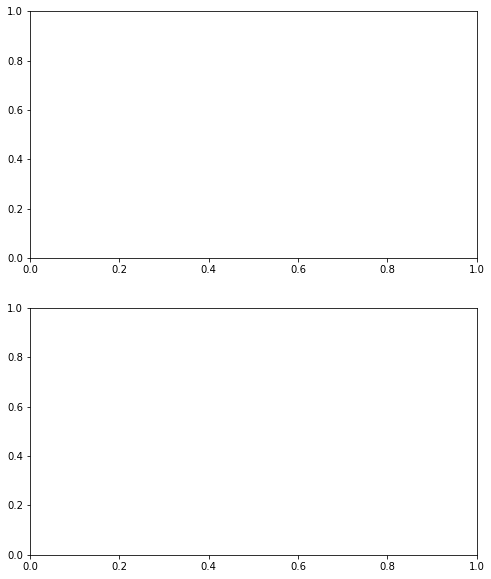

In [29]:
fig, axes = plt.subplots(2, 1, figsize = (8,10))

axes[0].plot(sy_harb_grp['date'], sy_harb_grp['enterococci_cfu_100ml'])
axes[1].plot(sy_harb_grp['date'], sy_harb_grp['water_temperature_c'])